# Carfax
### eCommerce Secondary Market for Cars
### by Jimmy Jing

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

carfax_df = pd.read_csv('final_data.csv')
print(carfax_df.shape)
carfax_df.sample(5)

(26181, 11)


,brand,model,year,price,color,mileage,body_type,damage,owners,usage,service_hist
2411,Audi,A5 Premium Plus,2018,37995,Red,8031,Hatchback,No Accident or Damage Reported,CARFAX 1-Owner,Personal Use,Service history
5450,Cadillac,Escalade Luxury,2012,18980,Black,98964,SUV,Accident Reported,CARFAX 1-Owner,Personal Use,Service history
17939,Lexus,ES 350,2015,22904,Silver,32476,Sedan,Damage Reported,CARFAX 1-Owner,Personal Use,Service history
19562,Mercedes-Benz,E-Class E 550,2010,16999,Silver,35367,Coupe,No Accident or Damage Reported,CARFAX 1-Owner,Personal Use,Service history
6806,Chevrolet,Malibu LT LT1,2018,14595,Black,45924,Sedan,Damage Reported,CARFAX 1-Owner,Rental Use,No service history


In [2]:
carfax_df[['price','mileage']].describe()

,price,mileage
count,26181.000000,26181.000000
mean,21461.904778,48134.977885
std,12591.327584,38474.942601
min,899.000000,1001.000000
25%,13992.000000,22341.000000
50%,18992.000000,36100.000000
75%,26595.000000,62745.000000
max,249000.000000,387536.000000


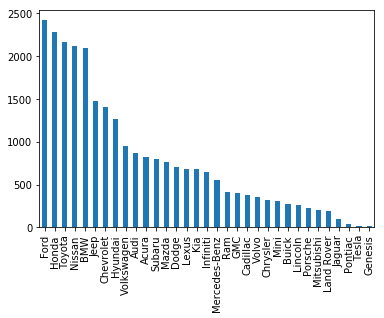

In [3]:
carfax_df.brand.value_counts().plot(kind='bar')

Big 5 (Ford,Honda,Toyota,Nissan,BMW) make up 42.3% of all cars in dataset.

Text(0.5, 0, 'Brands')

Text(0, 0.5, 'Median Price')

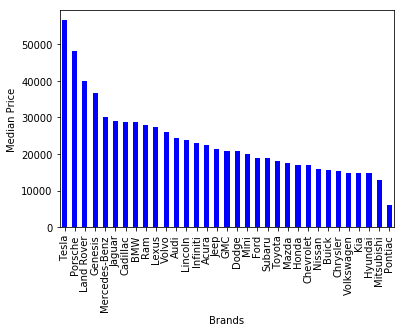

In [4]:
carfax_df.groupby('brand')['price'].median().sort_values(ascending=False).plot.bar(color='b')
plt.xlabel('Brands')
plt.ylabel('Median Price')

The highest median values have very low counts which makes the data hard to rely on. The Big 5 are all below average in terms of median price other than BMW. #BuyBEEMERS

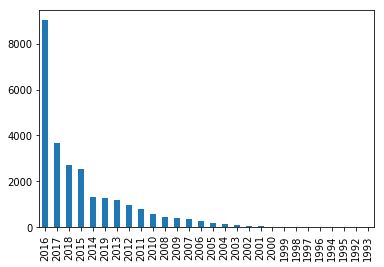

In [5]:
carfax_df.year.value_counts().plot(kind='bar')

2016 has most number of used cars for sale. Did carmakers make bad cars in 2016?
This decade 2010-2019 makes up 90%+ of all the cars in this dataset.

Text(0.5, 0, 'Type')

Text(0, 0.5, 'Count')

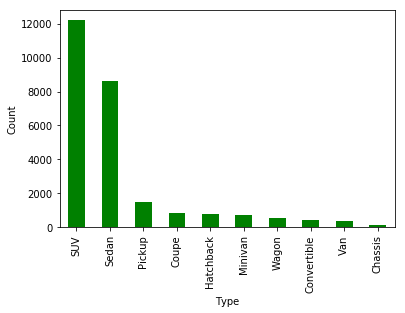

In [6]:
carfax_df.body_type.value_counts().plot.bar(color='g')
plt.xlabel('Type')
plt.ylabel('Count')

SUVs and Sedans reign supreme......or do they?

Text(0.5, 0, 'Color')

Text(0, 0.5, 'Count')

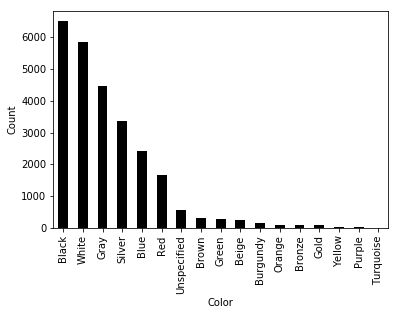

In [8]:
carfax_df.color.value_counts().plot.bar(color='k')
plt.xlabel('Color')
plt.ylabel('Count')

           Some colors are just ugly.

Text(0.5, 0, 'Color')

Text(0, 0.5, 'Median Price')

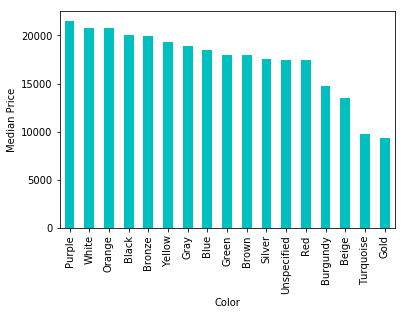

In [9]:
carfax_df.groupby('color')['price'].median().sort_values(ascending=False).plot.bar(color='c')
plt.xlabel('Color')
plt.ylabel('Median Price')

Text(0.5, 0, 'Owners')

Text(0, 0.5, 'Median Price')

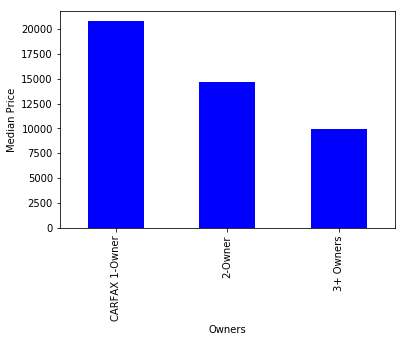

In [10]:
carfax_df.groupby('owners')['price'].median().sort_values(ascending=False).plot.bar(color='b')
plt.xlabel('Owners')
plt.ylabel('Median Price')

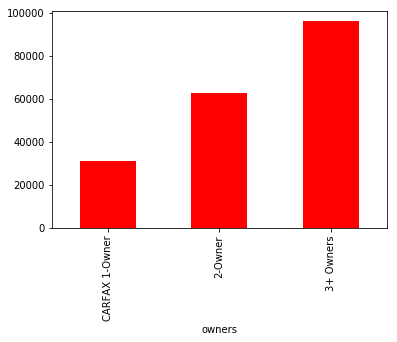

In [45]:
carfax_df.groupby('owners')['mileage'].median().sort_values(ascending=True).plot.bar(color='r')

Text(0.5, 0, 'Usage')

Text(0, 0.5, 'Median Price')

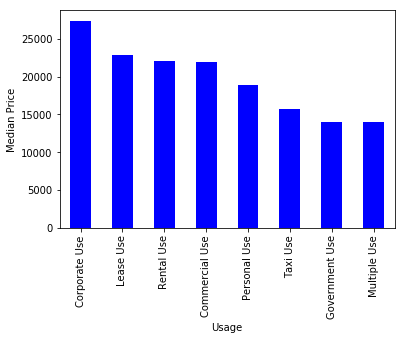

In [12]:
carfax_df.groupby('usage')['price'].median().sort_values(ascending=False).plot.bar(color='b')
plt.xlabel('Usage')
plt.ylabel('Median Price')

   What about the comparison of Usage and Brands? Are some brands more suited for a specific use case?

In [13]:
carfax_df.usage.value_counts()

Personal Use      19577
Multiple Use       2321
Rental Use         1964
Commercial Use     1159
Corporate Use       917
Lease Use           143
Taxi Use             80
Government Use       20
Name: usage, dtype: int64

Text(0.5, 0, 'Service History')

Text(0, 0.5, 'Median Price')

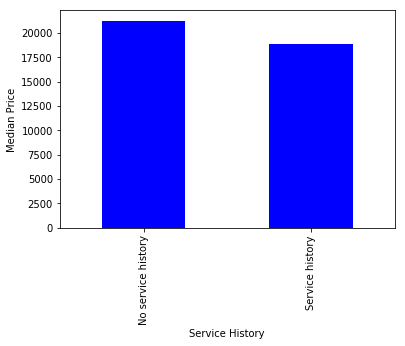

In [14]:
carfax_df.groupby('service_hist')['price'].median().sort_values(ascending=False).plot.bar(color='b')
plt.xlabel('Service History')
plt.ylabel('Median Price')

No service history is better? Error in dataset?

In [23]:
carfax_df.service_hist.value_counts()
carfax_df.groupby('service_hist')['mileage'].median()

Service history       24242
No service history     1939
Name: service_hist, dtype: int64

service_hist
No service history    25067
Service history       37284
Name: mileage, dtype: int64

Text(0.5, 0, 'Damage')

Text(0, 0.5, 'Median Price')

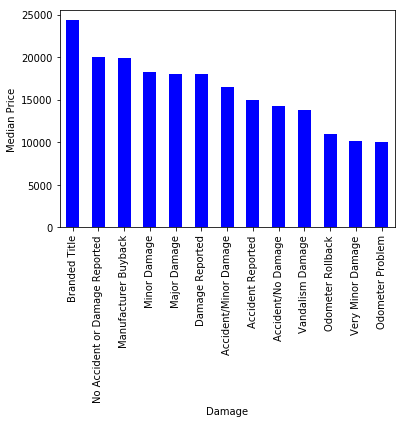

In [16]:
carfax_df.groupby('damage')['price'].median().sort_values(ascending=False).plot.bar(color='b')
plt.xlabel('Damage')
plt.ylabel('Median Price')

       What does all this mean?

In [25]:
carfax_df.damage.value_counts()
carfax_df.groupby('damage')['mileage'].median().sort_values(ascending=False)

No Accident or Damage Reported    19309
Accident Reported                  4182
Damage Reported                    1793
Major Damage                        344
Accident/Minor Damage               293
Branded Title                       185
Accident/No Damage                   38
Odometer Rollback                    13
Manufacturer Buyback                 11
Minor Damage                          6
Odometer Problem                      4
Vandalism Damage                      2
Very Minor Damage                     1
Name: damage, dtype: int64

damage
Very Minor Damage                 114056.0
Vandalism Damage                   97709.5
Odometer Rollback                  94965.0
Odometer Problem                   83114.5
Accident/No Damage                 80900.0
Minor Damage                       66778.5
Accident Reported                  57457.5
Accident/Minor Damage              50995.0
Damage Reported                    42762.0
Major Damage                       37603.5
No Accident or Damage Reported     33461.0
Branded Title                      16305.0
Manufacturer Buyback                7067.0
Name: mileage, dtype: float64

### Parting thoughts:

1. Indepth Groupbys/Scatterplots with Colormaps
2. Comparison with data on new car sales.
3. Time Elapsed on site/Secondary market liquidity.
4. Location Bias